In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import re
from wordcloud import WordCloud

In [72]:
data = pd.read_csv(f"..\\..\\results\\working_results\\mT5\\duplicates\\duplicates_combined_all_levels.csv")
data_unique = pd.read_csv(f"..\\..\\results\\working_results\\mT5\\unique\\unique_combined_all_levels.csv")

In [73]:
# Drop rows with NaN values in the 'Levenshtein distance (avg)' column
data = data.dropna(subset=['Levenshtein distance (avg)'])
data_unique = data_unique.dropna(subset=['Levenshtein distance (avg)'])

data_duplicate_unique = pd.concat([data, data_unique], ignore_index=False)

In [74]:
df = data_duplicate_unique
df.head()

,Sequence id,Model size,Input sequence (ground truth),Input sequence (masked),Model output sequence,Masked tokens,Filled tokens,Number of masked tokens,Masking percentage,Duplicate count,Levenshtein distances,Levenshtein distance (avg),Title,Unnamed: 0
0,seq0-0,small,. Thijmen Geluk SalarisHoeveel verdien je? Da...,. Thijmen Geluk SalarisHoeveel verdien je? Dat...,. Thijmen Geluk SalarisHoeveel verdien je? Dat...,['elke week'],['zeker'],2,15.0,19,[0.7777777777777778],0.78,ad,NaN
1,seq1-0,small,Meld je aan voor de AD sportnieuwsbrief en ont...,Meld je aan voor <extra_id_0> sportnieuwsbrief...,Meld je aan voor een sportnieuwsbrief en ontva...,['de AD'],['een'],2,15.0,16,[0.8],0.80,ad,NaN
2,seq2-0,small,Fotograaf Nico Brons en verslaggever Wichard M...,Fotograaf Nico Brons en verslaggever Wichard M...,Fotograaf Nico Brons en verslaggever Wichard M...,['het nieuws.'],[''],2,15.0,16,[1.0],1.00,ad,NaN
3,seq3-0,small,Tip van de BaasWie beter dan de baas weet hoe ...,Tip van de BaasWie <extra_id_0> baas weet hoe ...,Tip van de BaasWie de baas weet hoe het werkt ...,"['beter dan de', 'hn beste tips.']","['de', 'tips']",6,15.0,14,"[0.8333333333333334, 0.7142857142857143]",0.77,ad,NaN
4,seq4-0,small,David en Arjan van 365dagensuccesvol.nl hebben...,David en Arjan van 365dagensuccesvol.nl hebben...,David en Arjan van 365dagensuccesvol.nl hebben...,['land van'],['van'],2,15.0,14,[0.625],0.62,ad,NaN


In [75]:
df_filtered = df[(df['Model size'] == 'xl') & (df['Masking percentage'] == 15) & (df['Levenshtein distance (avg)'] == 0)]
df_filtered = df_filtered[['Filled tokens']]

In [76]:
df_filtered['clean'] = df_filtered['Filled tokens'].str.replace(r"[^\w\s]", "", regex=True)

In [77]:
df_filtered

,Filled tokens,clean
1675,['land van'],land van
1685,['aan voor de'],aan voor de
1692,['en onbekenden'],en onbekenden
1756,['de hand van'],de hand van
1779,['nieuws van de'],nieuws van de
...,...,...
3871,['is ontstemd dat Rusland'],is ontstemd dat Rusland
3918,"['waarschuwde voor de', 'voor het Kirgizische']",waarschuwde voor de voor het Kirgizische
3991,['uit onderzoek van'],uit onderzoek van
4014,['jaar geleden dat Pim'],jaar geleden dat Pim


In [78]:
# Expand text into separate words within each row
def expand_text(row):
  #return pd.Series(row['clean'].lower().split())
  return pd.Series(row['clean'].split())

df_exploded = df_filtered.apply(expand_text, axis=1).stack().reset_index(name='text')

# Count word occurrences
word_counts = df_exploded['text'].value_counts()

# Sort by count (descending)
word_counts_sorted = word_counts.sort_values(ascending=False)

print("Most frequent words")
print(word_counts_sorted.head(10))

print("Least frequent words")
print(word_counts_sorted.tail(10))

Most frequent words
text
de      32
van     24
een     12
het     11
op      11
voor    10
en      10
in      10
is       8
die      5
Name: count, dtype: int64
Least frequent words
text
Pim         1
Rica        1
waarvoor    1
geslacht    1
iets        1
gedaan      1
Sabel       1
monument    1
probleem    1
verbood     1
Name: count, dtype: int64


In [79]:
print(len(word_counts_sorted))

180


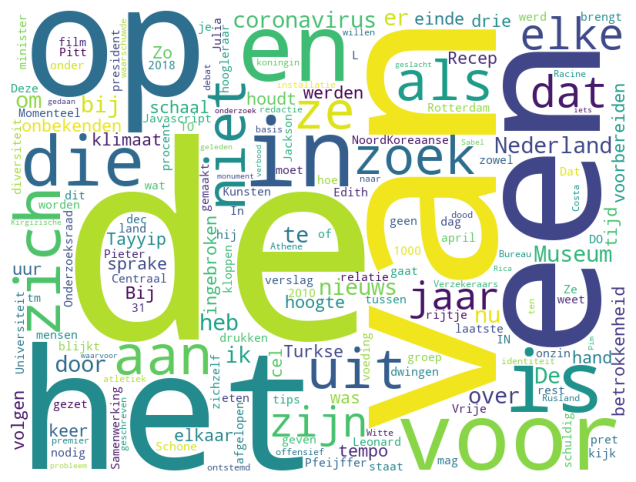

In [80]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", width=800, height=600)

# Generate the word cloud
wordcloud.generate_from_frequencies(word_counts_sorted)

# Create a figure
plt.figure(figsize=(8, 6))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis("off")

# Show the word cloud
plt.show()

In [81]:
# Define a name check function (customize as needed)
def is_potential_name(word):
  # Basic check: starts with a capital letter and length > 1
  return word.istitle() and len(word) > 3

# Identify potential names and their frequencies
potential_names = [(word, freq) for word, freq in word_counts_sorted.items() if is_potential_name(word)]

# Sort potential names by frequency in descending order
sorted_potential_names = sorted(potential_names, key=lambda x: x[1], reverse=True)

# Print results
if sorted_potential_names:
    print("Most frequent words starting with a capital letter:")
    for word, freq in sorted_potential_names:
        print(f"{word}: {freq}")
else:
    print("No potential names found in the list.")

Most frequent words starting with a capital letter:
Museum: 2
Nederland: 2
Tayyip: 1
Turkse: 1
Recep: 1
Javascript: 1
Momenteel: 1
Onderzoeksraad: 1
Jackson: 1
Rotterdam: 1
Vrije: 1
Samenwerking: 1
Leonard: 1
Pfeijffer: 1
Centraal: 1
Edith: 1
Julia: 1
Pitt: 1
Universiteit: 1
Pieter: 1
Deze: 1
Schone: 1
Kunsten: 1
Witte: 1
Athene: 1
Racine: 1
Verzekeraars: 1
Bureau: 1
Costa: 1
Rusland: 1
Kirgizische: 1
Rica: 1
Sabel: 1


In [82]:
len(sorted_potential_names)

33

In [83]:
# List to store words with numbers
words_with_numbers = []

# Check for numbers in each word
for word, freq in word_counts_sorted.items():
  if any(char.isdigit() for char in word):
    words_with_numbers.append(word)

# Print the list of words with numbers
if words_with_numbers:
  print("Words containing numbers:")
  print(*words_with_numbers, sep=", ")  # Print words separated by comma
else:
  print("No words containing numbers found in the list.")


Words containing numbers:
31, 2010, 2018, 1000


In [84]:
df_filtered = df[(df['Model size'] == 'xl') & (df['Masking percentage'] == 15) & (df['Levenshtein distance (avg)'] == 0)]

# Define the list of most frequent capitalized words
capitalized_words = ["Museum", "Nederland", "Tayyip", "Turkse", "Recep", "Javascript", "Momenteel", 
                     "Onderzoeksraad", "Jackson", "Rotterdam", "Vrije", "Samenwerking", "Leonard", 
                     "Pfeijffer", "Centraal", "Edith", "Julia", "Pitt", "Universiteit", "Pieter", 
                     "Deze", "Schone", "Kunsten", "Witte", "Athene", "Racine", "Verzekeraars", 
                     "Bureau", "Costa", "Rusland", "Kirgizische", "Rica", "Sabel"]

# Function to check if any filled token matches the capitalized words
def contains_capitalized_word(filled_tokens, capitalized_words):
    return any(token in capitalized_words for token in eval(filled_tokens))

# Apply the function to filter the DataFrame
matching_examples = df_filtered[df_filtered['Filled tokens'].apply(lambda tokens: contains_capitalized_word(tokens, capitalized_words))]

# Display the matching examples
matching_examples[['Input sequence (ground truth)', 'Input sequence (masked)', 'Model output sequence', 'Filled tokens']]

,Input sequence (ground truth),Input sequence (masked),Model output sequence,Filled tokens
5533,"Studie: Business administration, Nyenrode (199...","Studie: Business administration, Nyenrode (199...","Studie: Business administration, Nyenrode (199...",['Universiteit']


In [85]:
matching_examples.loc[1442]

KeyError: 1442

In [88]:
df_filtered = df[(df['Masking percentage'] == 15) & (df['Levenshtein distance (avg)'] == 0)]

match_1 = df_filtered.loc[3918]
match_1

Sequence id                                                               seq205-0
Model size                                                                      xl
Input sequence (ground truth)    'Leger moet Russen in Kirgizi beschermen' MOSK...
Input sequence (masked)          'Leger moet Russen in Kirgizi beschermen' MOSK...
Model output sequence            'Leger moet Russen in Kirgizi beschermen' MOSK...
Masked tokens                      ['waarschuwde voor de', 'voor het Kirgizische']
Filled tokens                      ['waarschuwde voor de', 'voor het Kirgizische']
Number of masked tokens                                                          6
Masking percentage                                                            15.0
Duplicate count                                                                  1
Levenshtein distances                                                   [0.0, 0.0]
Levenshtein distance (avg)                                                     0.0
Titl

In [108]:
match_1['Filled tokens']

"['waarschuwde voor de', 'voor het Kirgizische']"

In [98]:
df_fil = df[df['Input sequence (ground truth)'].str.contains("Leger moet Russen in Kirgizi")] 
df_fil

,Sequence id,Model size,Input sequence (ground truth),Input sequence (masked),Model output sequence,Masked tokens,Filled tokens,Number of masked tokens,Masking percentage,Duplicate count,Levenshtein distances,Levenshtein distance (avg),Title,Unnamed: 0
2829,seq205-0,small,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,"['waarschuwde voor de', 'voor het Kirgizische']","['heeft', 'met zijn']",6,15.0,1,"[0.8947368421052632, 0.75]",0.82,volkskrant,NaN
3192,seq205-0,base,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,"['waarschuwde voor de', 'voor het Kirgizische']","['ziet', 'voor het']",6,15.0,1,"[0.9473684210526315, 0.6]",0.77,volkskrant,NaN
3555,seq205-0,large,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,"['waarschuwde voor de', 'voor het Kirgizische']","['ziet de', 'voor het']",6,15.0,1,"[0.7894736842105263, 0.6]",0.69,volkskrant,NaN
3918,seq205-0,xl,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,'Leger moet Russen in Kirgizi beschermen' MOSK...,"['waarschuwde voor de', 'voor het Kirgizische']","['waarschuwde voor de', 'voor het Kirgizische']",6,15.0,1,"[0.0, 0.0]",0.00,volkskrant,NaN


In [105]:
indices = [2829, 3192, 3555, 3918]

for i in indices:
    match = df.loc[i]
    print(f"Index: {i}")
    print(f"Model size: {match['Model size']}")
    print("Input sequence (ground truth):", match['Input sequence (ground truth)'])
    print("Input sequence (masked):", match['Input sequence (masked)'])
    print("Model output sequence:", match['Model output sequence'])
    print("Filled tokens:", match['Filled tokens'])
    print("")

Index: 2829
Model size: 2829    small
2829    small
Name: Model size, dtype: object
Input sequence (ground truth): 2829    t/m 16 sept in The National Gallery 00-4420774...
2829    'Leger moet Russen in Kirgizi beschermen' MOSK...
Name: Input sequence (ground truth), dtype: object
Input sequence (masked): 2829    t/m 16 sept in The National Gallery 00-4420774...
2829    'Leger moet Russen in Kirgizi beschermen' MOSK...
Name: Input sequence (masked), dtype: object
Model output sequence: 2829    t/m 16 sept in The National Gallery 00-4420774...
2829    'Leger moet Russen in Kirgizi beschermen' MOSK...
Name: Model output sequence, dtype: object
Filled tokens: 2829                     ['']
2829    ['heeft', 'met zijn']
Name: Filled tokens, dtype: object

Index: 3192
Model size: 3192    small
3192     base
Name: Model size, dtype: object
Input sequence (ground truth): 3192    . In zijn tweede film observeert de Taiwanese ...
3192    'Leger moet Russen in Kirgizi beschermen' MOSK...
Name: In